###Reffered https://medium.com/@diellorhoxhaj/linear-regression-car-price-prediction-and-data-analysis-112883cdd39b

Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import plotly.express as px

Data Collection and Processing

In [2]:
df = pd.read_csv('/content/car_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

Exploratory Analysis and Visualization

In [5]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#Explore some statistics for the numerical columns
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Analysis of Numerical Features
####Year

In [8]:
fig = px.histogram(df,
                   x='Year',
                   marginal='box',
                   nbins=16,
                   title='Distribution of Year')
fig.update_layout(bargap=0.1)
fig.show()

####Selling Price

In [9]:
fig = px.histogram(df,
                   x='Selling_Price',
                   marginal='box',
                   color='Transmission',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

####Kilometers Driven

In [10]:
fig = px.histogram(df,
                   x='Kms_Driven',
                   marginal='box',
                   color_discrete_sequence=['green'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

#####As we can see from the plot above, most of the numerical values range from 0 to 100k kms, and there are some outliers.

Another intuitive hypothesis that we could make is that the more kilometers a car has, the lower its price will be. Let’s see if this is true.

In [11]:
#We can use a scatter plot to visualize the relationship between two numerical features.
fig = px.scatter(df,
                 x='Kms_Driven',
                 y='Selling_Price',
                 opacity=0.8,
                 title='Kilometers driven vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

#####We can’t say that from this plot above we can’t conclude that the more kilometers the cheaper the prices. But this can also be because of the distribution of Kms since most of the values are in 0–100k.

####check if Selling_Price and Present_Price are correlated

In [12]:
fig = px.scatter(df,
                 x='Present_Price',
                 y='Selling_Price',
                 opacity=0.8,
                 title='Selling Price vs Present Price')
fig.update_traces(marker_size=5)
fig.show()

#####As we can see, the greater the present price the greater the selling price, this is also intuitive because the cars that are expensive, will probably also be sold at higher prices.


In [13]:
fig = px.scatter(df,
                 x='Year',
                 y='Selling_Price',
                 opacity=0.8,
                 title='Year vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

#####We could also see that the newer the cars, the higher the selling price.

####Correlation


#####As we can observe from the analysis, some columns are more closely related to the selling price, compared to the others. For example “Year” gets larger, and so does the Selling_Price. While Kilometers driven and selling prices do not grow together.

In [17]:
print(df.Selling_Price.corr(df.Year))
print(df.Selling_Price.corr(df.Present_Price))
print(df.Selling_Price.corr(df.Kms_Driven))

0.23614098016042737
0.8789825451614951
0.029187090674291236


#####We could observe from the values above, that there’s a high correlation between present_price and selling_price but less correlation between kilometers driven and Year.

In [19]:
df.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


Let’s say the coefficient value between two features is r:
When the value of ‘r’ is between 0 and +1/-1, it indicates that there is a relationship between the two variables, but it’s not perfectly linear — the data points don’t all fall on a straight line.

If ‘r’ is close to +1, it indicates a strong positive linear relationship. That means as one variable increases, the other variable also tends to increase, and the data points will cluster tightly around a rising straight line.

If ‘r’ is close to -1, it signifies a strong negative linear relationship. This means that as one variable increases, the other tends to decrease, with data points clustering tightly around a falling straight line.

An ‘r’ value near 0 indicates that there’s little or no linear relationship between the two variables. The data points will be spread out and won’t fall close to a line in either an increasing or decreasing direction.

Text(0.5, 1.0, 'Correlation Matrix')

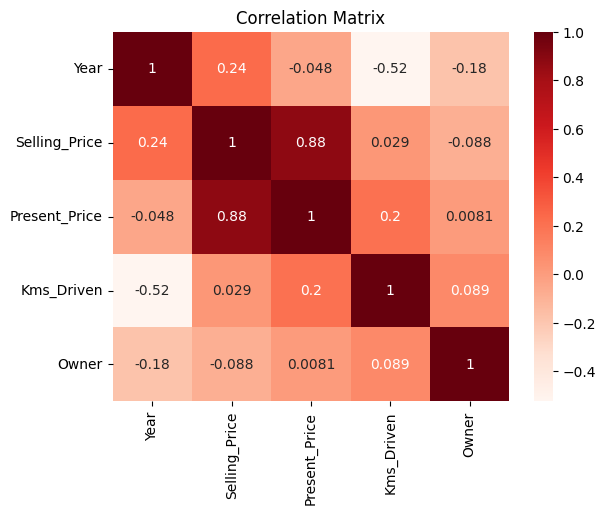

In [21]:
#The table above is usually visualized using a heatmap
sns.heatmap(df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

#####We could use this Feature “Present Price” to predict our desired output “Selling_price” as there is high correlation

####Linear Regression using a Single Feature

In [23]:
fig = px.scatter(df,
                 x='Present_Price',
                 y='Selling_Price',
                 opacity=0.8,
                 title='Present price vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

In this dataset, the values that are under the column (feature) “Present_Price” are considered as the model’s input, while the values in the “Selling Price” column are known as “targets”

In [26]:
#The ‘w’ and ‘b’ are usually known as model parameters or their weights.
#Formula  = selling_price = w * present_price + b
def estimate_selling_price(present_price, w, b):
    return w * present_price + b

In [27]:
#Now initialize “Guess” some w and b values, use the present price, and estimate the selling price.
w = 4
b = 50
estimate_selling_price(12.5,w,b)

100.0

In [28]:
#Now let’s get all values of the Present_Price column (our feature), and make predictions of the selling_price for each present_price available in our set.
present_prices = df.Present_Price
present_prices

,Present_Price
0,5.59
1,9.54
2,9.85
3,4.15
4,6.87
...,...
296,11.60
297,5.90
298,11.00
299,12.50


In [29]:
## These are the actual real selling prices that we have in our dataset (from historical data)
df.Selling_Price

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [30]:
#Now we make predictions using the estimate_selling_price method, with our guessed values w, b.
estimated_selling_prices = estimate_selling_price(present_prices, w, b)
estimated_selling_prices

,Present_Price
0,72.36
1,88.16
2,89.40
3,66.60
4,77.48
...,...
296,96.40
297,73.60
298,94.00
299,100.00


Above we have our predicted values for the price, in the plot below, we can see the line that we’re fitting based on our w and b values, and how well our model (that line) actually fits the data. We can see that the line is really off the course, and it’s probably gonna make predictions with huge errors.
We can try different values of w and b, and we will have a different line. The goal is to find a line that fits the data as closely as possible, so then whenever we have a new unseen present price of a car (x input), we would be able to predict (y output) its selling price based on the present price.

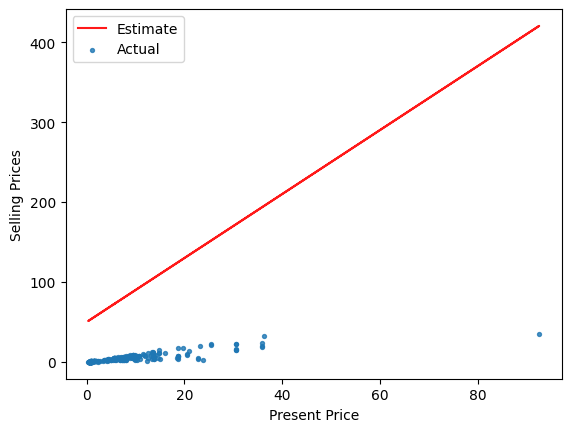

In [31]:
plt.plot(present_prices, estimated_selling_prices, 'r', alpha=0.9);

target = df.Selling_Price
plt.scatter(present_prices, target, s=8,alpha=0.8);
plt.xlabel('Present Price')
plt.ylabel('Selling Prices')
plt.legend(['Estimate', 'Actual'])

As we change the w and b values, trying to move the line closer to the points, we are learning the relationship between present_price and selling_price.

####Cost Function

To calculate the error of our model (initially we’re guessing values of w,b), we have to compare it with the true values that are provided in our dataset.

The formula is also called root mean squared error.

####Finding Best w, b parameters (Optimization)

The strategy that modifies the weights w, b in order to reduce the LOSS that were computing which results in the best line can be done using a technique called

Gradient Descent
Or it can be computed using the ordinary least square method

####Linear Regression (single-feature) using the scikit-learn library

In [32]:
model = LinearRegression()

# Define inputs and targets that will be used to train the model (i.e. learn the weights and biases)
inputs = df[['Present_Price']]
targets = df.Selling_Price
model.fit(inputs,targets) # train the model, this method will find the best line that fits the data and minimize the error using the techniques that were disucssed above

LinearRegression()

In [33]:
#Now you can make predictions of selling price using your information on present price

import numpy as np
model.predict(np.array([[10.8],
                        [12.5],
                        [6.9]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([6.30049697, 7.17914031, 4.28478576])

You can make predictions on your input data (which you already know their true value), and evaluate your model.

In [34]:
predictions = model.predict(inputs)
predictions

array([ 3.60771353,  5.64926719,  5.80949039,  2.86345093,  4.26928029,
        5.79915341,  4.91534157,  5.1685976 ,  5.31331532,  5.3288208 ,
        2.57918397,  6.08342038,  5.8560068 ,  4.70343347,  4.44500896,
        6.29532848,  6.29532848,  6.29532848,  3.34928902,  4.84298271,
        2.76008113,  3.66973542,  4.85848818,  2.50682511,  2.99783168,
        3.29760412,  3.75243126,  4.07287766,  2.76008113,  6.08342038,
        3.80928465,  3.24591921,  4.58972669,  5.86117529,  4.88433063,
        4.71893894,  4.43984047,  1.89694325,  2.66187981,  4.84298271,
        4.78612932,  2.7755866 ,  4.41399802,  4.88433063,  2.10885135,
        6.94138976,  3.24591921,  2.86345093,  4.70343347,  5.52005494,
       16.5392762 , 16.5392762 , 10.93663274, 16.5392762 ,  5.99555604,
        8.49193684,  4.4760199 , 10.30090844,  4.23310086, 19.3044185 ,
       10.33708787,  4.69826498, 19.3044185 , 19.3044185 , 19.44396773,
        4.31062821, 12.68358246, 11.28809008,  7.82003311, 11.52

The predictions array will hold your predicted values for each input. You can also check out the real values (targets) and compare them.

In [35]:
## REAL TARGETS
targets # outputs the values of selling_price of our dataset.

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [36]:
#Compute the total cost function of this model (the error of the best w,b that were found).

from sklearn.metrics import mean_squared_error as rmse
rmse(targets, predictions)

5.855089487051356

Our prediction is off my 5.8 on average, which is not that bad, and we only used one feature, it definitely could be improved.

In [37]:
#We can print out the best values of w, b found such that our model fits the data as well as possible.

# Weight - w (slope)
print(model.coef_)

# Bias - b (intercept)
print(model.intercept_)

[0.51684903]
0.7185274709817686


Now let’s use our estimated_selling_prices function again but with our weights and biases values from the code above.

In [38]:
w = model.coef_[0]
b = model.intercept_
estimated_selling_prices = estimate_selling_price(present_prices, w, b)
estimated_selling_prices

,Present_Price
0,3.607714
1,5.649267
2,5.809490
3,2.863451
4,4.269280
...,...
296,6.713976
297,3.767937
298,6.403867
299,7.179140


Let’s visualize the best-fit line now since we have our weight and bias computed using the .fit() method

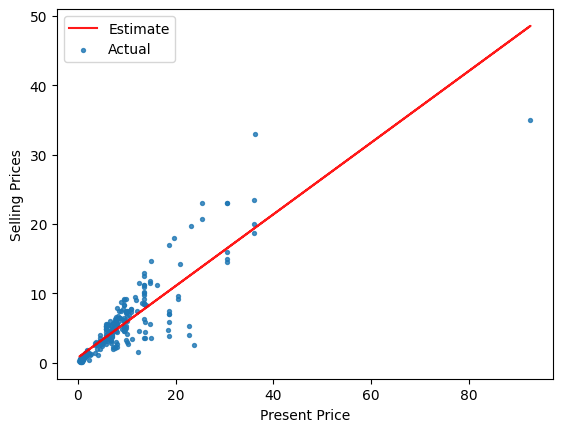

In [39]:
plt.plot(present_prices, estimated_selling_prices, 'r', alpha=0.9)
target = df.Selling_Price
plt.scatter(present_prices, target, s=8,alpha=0.8)
plt.xlabel('Present Price')
plt.ylabel('Selling Prices')
plt.legend(['Estimate', 'Actual'])

As we can see this is a much better model than the randomly guessed weights and biases that we initially did. So for any other new unseen input data that we might input as Present Price, following this model, we will get an approximation of its Selling Price.

####Linear Regression using Multiple Features

In [40]:
# Create inputs and targets
inputs = df[['Present_Price', 'Year','Kms_Driven']]
targets = df.Selling_Price

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 3.8595166657593194


As we can observe from the loss value, with multiple features used as our input, the model’s performance improved and the error dropped to 3.85.

####Categorical Features

In our dataset, we also have categorical features such as Fuel_Type, Seller_Type, and Transmission. First, it’s important to observe how each value in one specific category affects the selling price

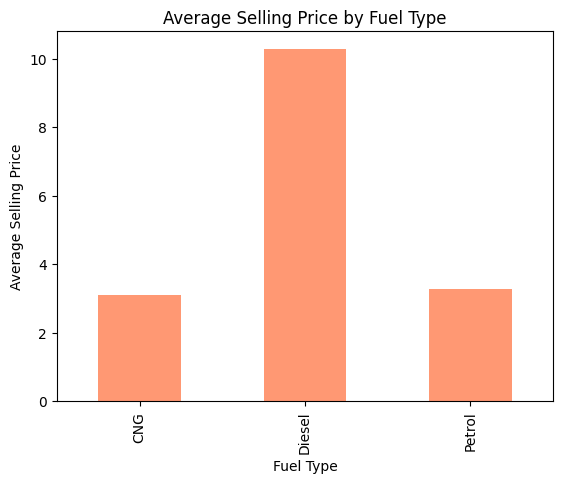

In [47]:
# Group the data by Fuel_Type and calculate the mean Selling Price
fuel_price_data = df.groupby('Fuel_Type')['Selling_Price'].mean()

# Create a bar plot
fuel_price_data.plot(kind='bar', color='coral', alpha=0.8)

# Add labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Fuel Type')

# Display the plot
plt.show()

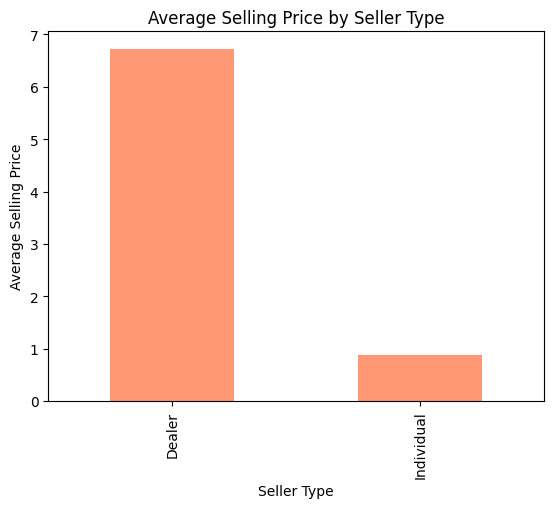

In [48]:
# Group the data by Seller_Type and calculate the mean Selling Price
seller_price_data = df.groupby('Seller_Type')['Selling_Price'].mean()

# Create a bar plot
seller_price_data.plot(kind='bar', color='coral', alpha=0.8)

# Add labels and title
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Seller Type')

# Display the plot
plt.show()

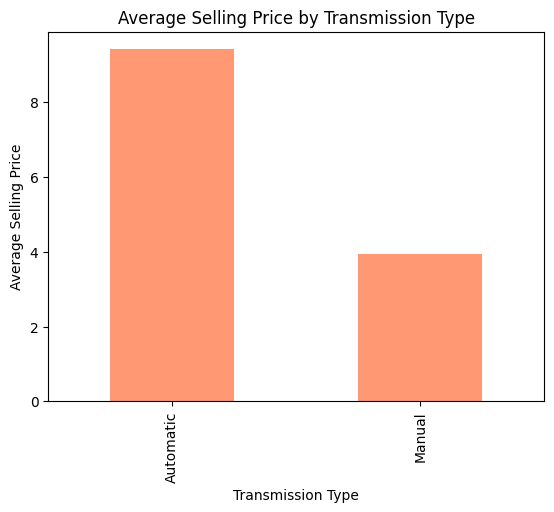

In [49]:
# Group the data by Transmission and calculate the mean Selling Price
transmission_price_data = df.groupby('Transmission')['Selling_Price'].mean()

# Create a bar plot
transmission_price_data.plot(kind='bar', color='coral', alpha=0.8)

# Add labels and title
plt.xlabel('Transmission Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Transmission Type')

# Display the plot
plt.show()

Observations:

- Cars with fuel type Diesel, seems that are more expensive.
- Cars with Automatic Transmission are more expensive.
- Cars with individual sellers are cheaper.

####One-Hot Encoding — Converting Categorical Data

In [50]:
df = pd.get_dummies(df, columns=['Fuel_Type','Seller_Type','Transmission'], drop_first=True)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,True,False,True
1,sx4,2013,4.75,9.54,43000,0,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,True,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,True,False,True
4,swift,2014,4.60,6.87,42450,0,True,False,False,True


Now let’s use all our features to train our model using Linear Regression

In [52]:
X = df.drop(['Car_Name','Selling_Price'], axis=1)
y = df['Selling_Price']

####Training, Validation and Test Sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

####Scaling The Features


In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

####Training the model

MAE:  1.2401911938820376
MSE:  3.486877549555715
MSE on training data:  2.8763210780593247
R2 score:  0.8504134196323437


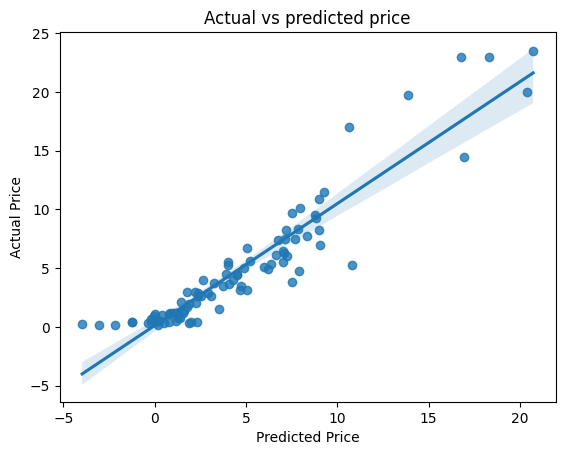

In [55]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

pred_train = model.predict(X_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("MSE on training data: ", (metrics.mean_squared_error(pred_train, y_train)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

####Evaluation

- MAE:  1.2401911938820378
- MSE:  3.4868775495557127
- MSE on training data:  2.8763210780593247
- R2 score:  0.850413419632344

From the error, we could see that the error dropped to 2.87 on train data, and on unseen data it’s 3.48 which is a good value, our predictions are off by 3.48.